In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch

In [2]:
base_dir = "/media/davidclark/DATA/VectorizedNets/"
run_dirs = os.listdir(base_dir)
num_runs = len(run_dirs)

#CIFAR/MNIST
#FC/CONV/LC
#Vec/Nonvec
#DF/BP
#Mixed/Mono
#Train/Test
#Runs
#Epochs
acc_vals = np.zeros((
    2, 3, 2, 2, 2, 2, num_runs, 20
))

num_runs

5

In [3]:
dsets = ['mnist', 'cifar']
archs = ['fc', 'conv', 'lc']
styles = ['vec', 'nonvec']
algos = ['df', 'bp']
signs = ['mono', 'mixed']

def build_dir_name(dset_idx, arch_idx, style_idx, algo_idx, sign_idx, run_idx):
    name = 'models_{}/{}_{}_{}_{}_{}'.format(run_idx,
        dsets[dset_idx], styles[style_idx], archs[arch_idx], algos[algo_idx], signs[sign_idx])
    return name
    
acc_vals[:] = np.nan
for dset_idx in range(len(dsets)):
    for arch_idx in range(len(archs)):
        for style_idx in range(len(styles)):
            for algo_idx in range(len(algos)):
                for sign_idx in range(len(signs)):
                    print('Here...')
                    for run_idx in range(num_runs):
                        subdir_name = build_dir_name(dset_idx, arch_idx, style_idx, algo_idx, sign_idx, run_idx)
                        dir_name = base_dir + subdir_name
                        epoch_dirs = os.listdir(dir_name)
                        epochs = np.sort([int(name.split('.')[0].split('_')[1]) for name in epoch_dirs])
                        for epoch_idx in range(len(epochs)):
                            epoch = epochs[epoch_idx]
                            to_load = dir_name + '/epoch_{}.pt'.format(epoch)
                            checkpoint = torch.load(to_load, map_location='cpu')
                            train_acc = checkpoint['train_accuracy']
                            test_acc = checkpoint['test_accuracy']
                            acc_vals[dset_idx, arch_idx, style_idx, algo_idx, sign_idx, :, run_idx, epoch_idx] = [train_acc, test_acc]



Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...
Here...


In [8]:
#np.save('acc_vals', acc_vals)

In [13]:
acc_vals = np.load('acc_vals.npy')
print(acc_vals.shape)

err_vals = 100*(1 - acc_vals)
err_vals_mean = np.nanmean(err_vals, axis=6)
err_vals_std = np.nanstd(err_vals, axis=6)


(2, 3, 2, 2, 2, 2, 5, 20)


<ipython-input-13-9316a1882a21>:5: RuntimeWarning: Mean of empty slice
  err_vals_mean = np.nanmean(err_vals, axis=6)


In [108]:
def plot_learning_curves(dset_idx):
    colors = ['red', 'black', 'pink', 'gray']
    archs_short = ['FC', "Conv", "LC"]
    styles_short = ["-Vec", ""]
    signs_short = ['+', '']
    algos_short = ['DF', 'BP']

    fig, axes = plt.subplots(2, 3, figsize=(10, 5), dpi=120)
    fig.subplots_adjust(hspace=0.3, wspace=0.25)
    for arch_idx in range(3):
        for style_idx in range(2):
            ax = axes[style_idx, arch_idx]
            title = archs_short[arch_idx] + styles_short[style_idx]
            ax.set_title(title)
            for sign_idx in range(2):
                for algo_idx in range(2):
                    name = algos_short[algo_idx] + signs_short[sign_idx]
                    i = algo_idx + 2*sign_idx
                    train_mean, test_mean = err_vals_mean[dset_idx, arch_idx, style_idx, algo_idx, sign_idx]
                    train_std, test_std = err_vals_std[dset_idx, arch_idx, style_idx, algo_idx, sign_idx]
                    ax.errorbar(x=np.arange(20), y=train_mean, yerr=train_std, ls="--", color=colors[i])
                    ax.errorbar(x=np.arange(20), y=test_mean, yerr=test_std, ls="-", color=colors[i], label=name)
                    if arch_idx == 0 and style_idx == 0:
                        ax.legend(ncol=4, fontsize=8, loc='upper right',
                                  frameon=False, borderpad=0, columnspacing=0.5, handletextpad=0.25)

    for ax in axes.flatten():
        ax.set_ylim(0, (80 if dset_idx == 1 else 6.1))
        t = np.arange(0, 20, 4)
        ax.set_xticks(t)
        ax.set_xticklabels(t*10)
        ax.set_ylabel("error (%)")
    for ax in axes[1]:
        ax.set_xlabel('epochs')

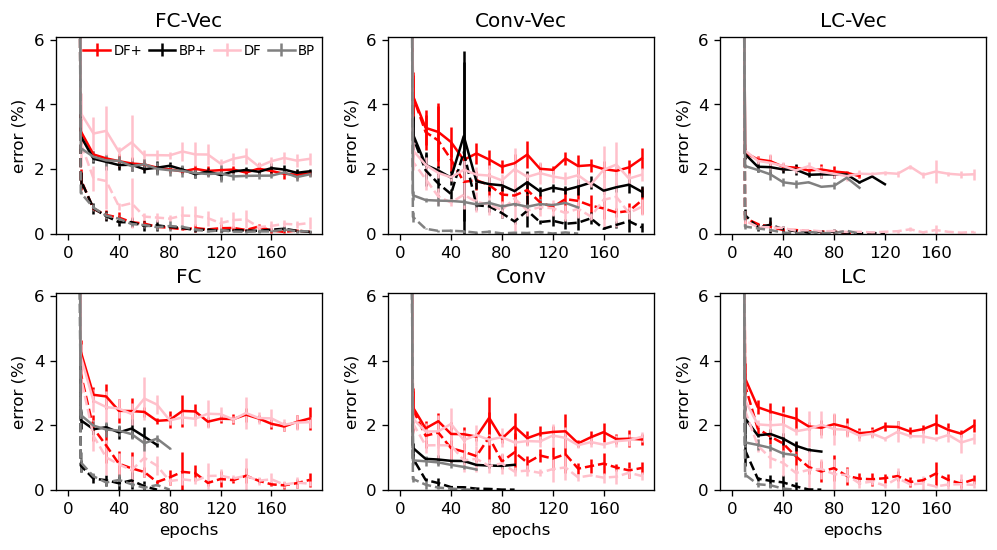

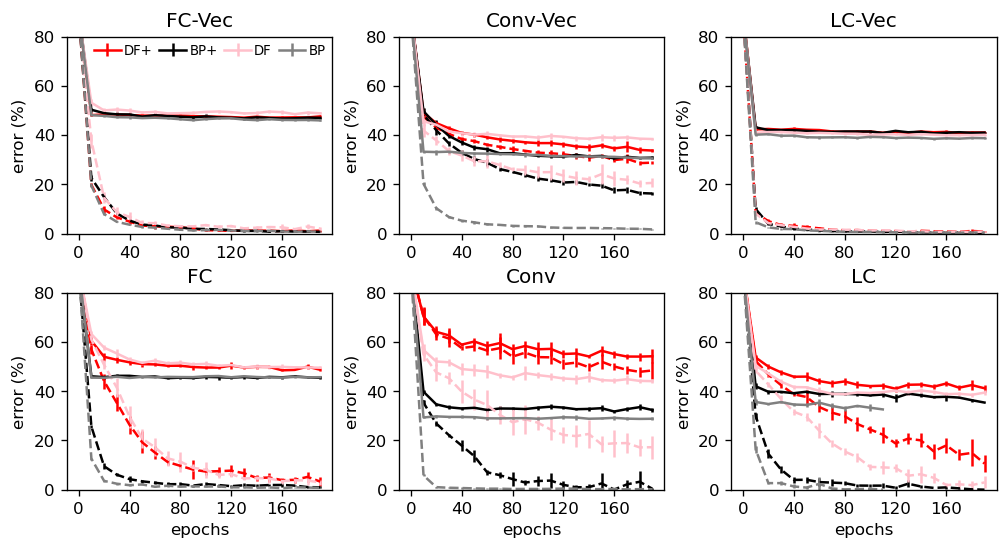

In [111]:
plot_learning_curves(0)
plt.savefig('figs/mnist_learning_curves.pdf', bbox_inches='tight')

plot_learning_curves(1)
plt.savefig('figs/cifar_learning_curves.pdf', bbox_inches='tight')